In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/housing.csv")

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
meanvalues = df.mean()

/tmp/ipykernel_3177/589209272.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  meanvalues = df.mean()


In [9]:
df.fillna(meanvalues, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
unique_values = df['ocean_proximity'].unique()
print (unique_values)

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [12]:
# Create a mapping dictionary to assign labels
label_mapping = {value: label for label, value in enumerate(unique_values, start=1)}


In [13]:
# Add a new column with the labels
df['ocean_proximity_encoded'] = df['ocean_proximity'].map(label_mapping)


In [14]:
# Change the datatype of the label-encoded column to int
df['ocean_proximity_encoded'] = df['ocean_proximity_encoded'].astype(int)


In [15]:
df.drop(columns=['ocean_proximity'], inplace=True)

In [16]:
print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

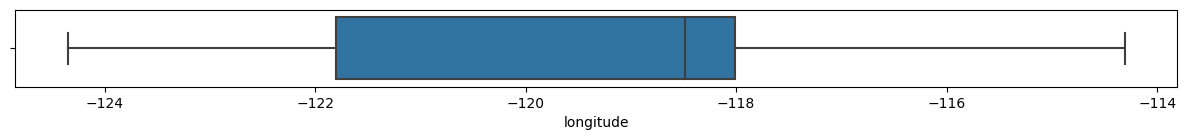

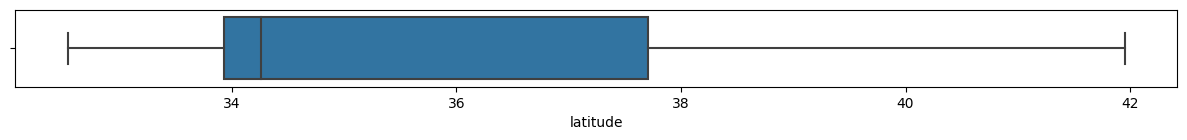

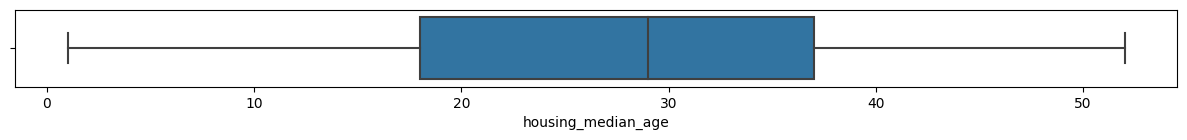

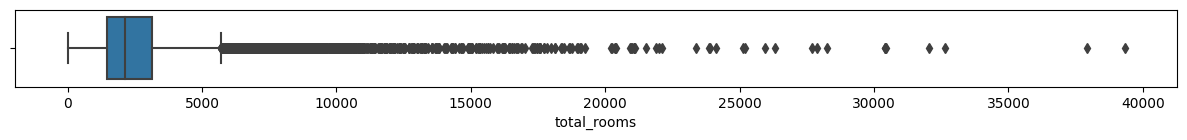

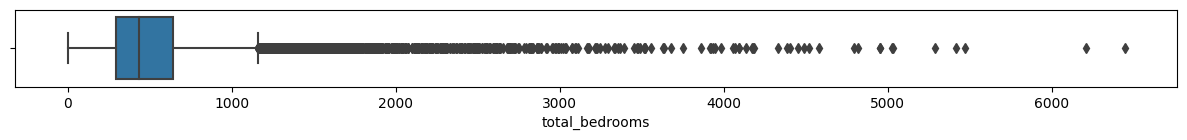

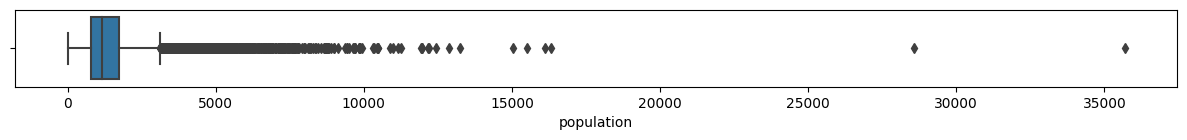

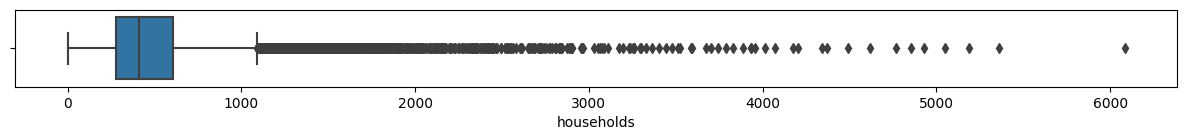

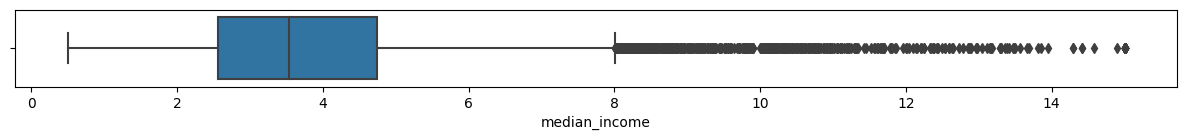

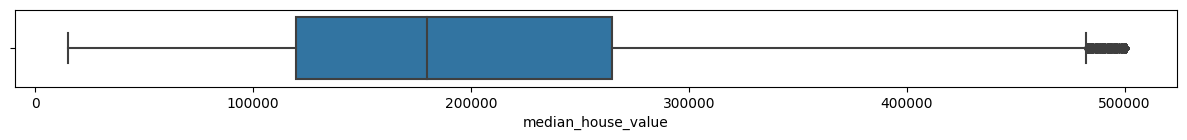

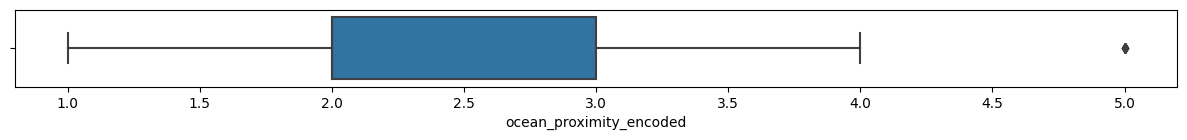

In [17]:
check_1 = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity_encoded']

for i in check_1:
  plt.figure(figsize = (15,1))
  sns.boxplot(x=df[i])

In [18]:
# Define a function to apply outlier treatment using NumPy vectorized operations
def apply_outlier_treatment(column):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1
    toprange = q3 + iqr * 1.5
    botrange = q1 - iqr * 1.5
    column = np.where(column > toprange, toprange, column)
    column = np.where(column < botrange, botrange, column)
    return column

In [19]:
check_1 = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity_encoded']

In [20]:
df[check_1] = df[check_1].apply(apply_outlier_treatment, axis=0)


In [21]:
print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0      880.000           129.0   
1        -122.22     37.86                21.0     5698.375          1106.0   
2        -122.24     37.85                52.0     1467.000           190.0   
3        -122.25     37.85                52.0     1274.000           235.0   
4        -122.25     37.85                52.0     1627.000           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0     1665.000           374.0   
20636    -121.21     39.49                18.0      697.000           150.0   
20637    -121.22     39.43                17.0     2254.000           485.0   
20638    -121.32     39.43                18.0     1860.000           409.0   
20639    -121.24     39.37                16.0     2785.000           616.0   

       population  households  median_income  media

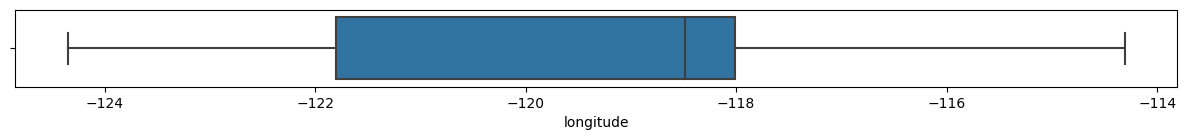

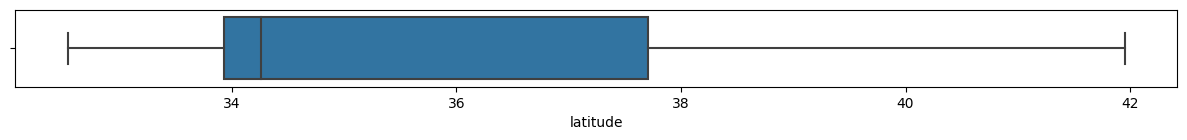

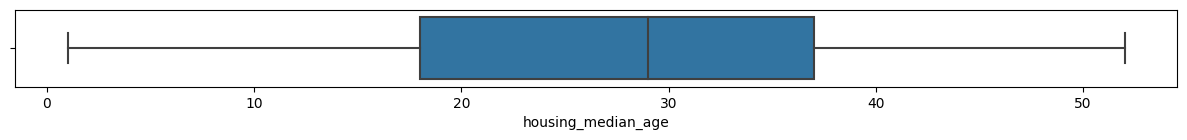

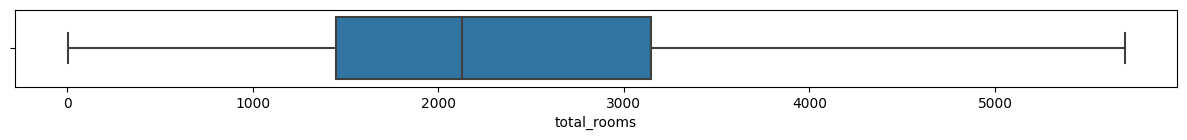

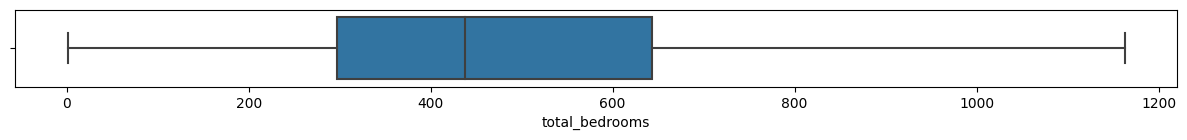

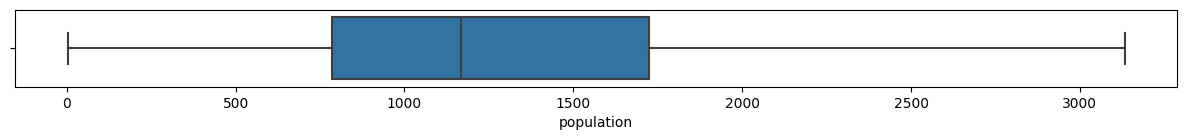

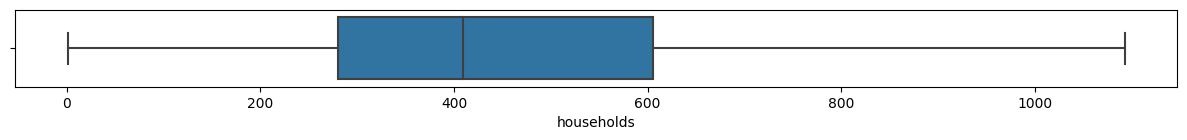

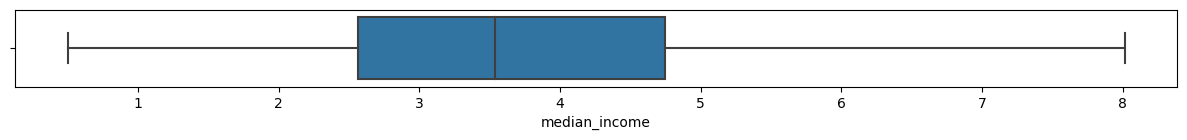

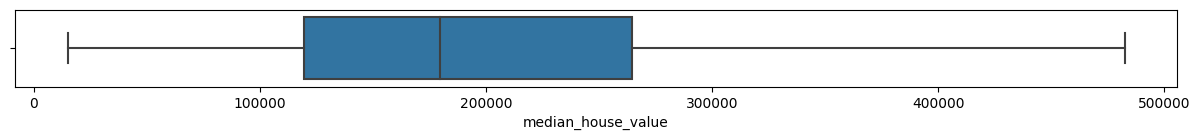

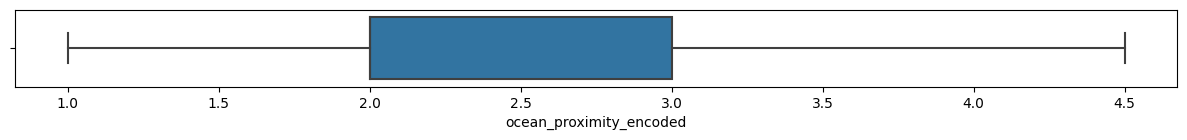

In [22]:
for i in check_1:
  plt.figure(figsize = (15,1))
  sns.boxplot(x=df[i])

In [23]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

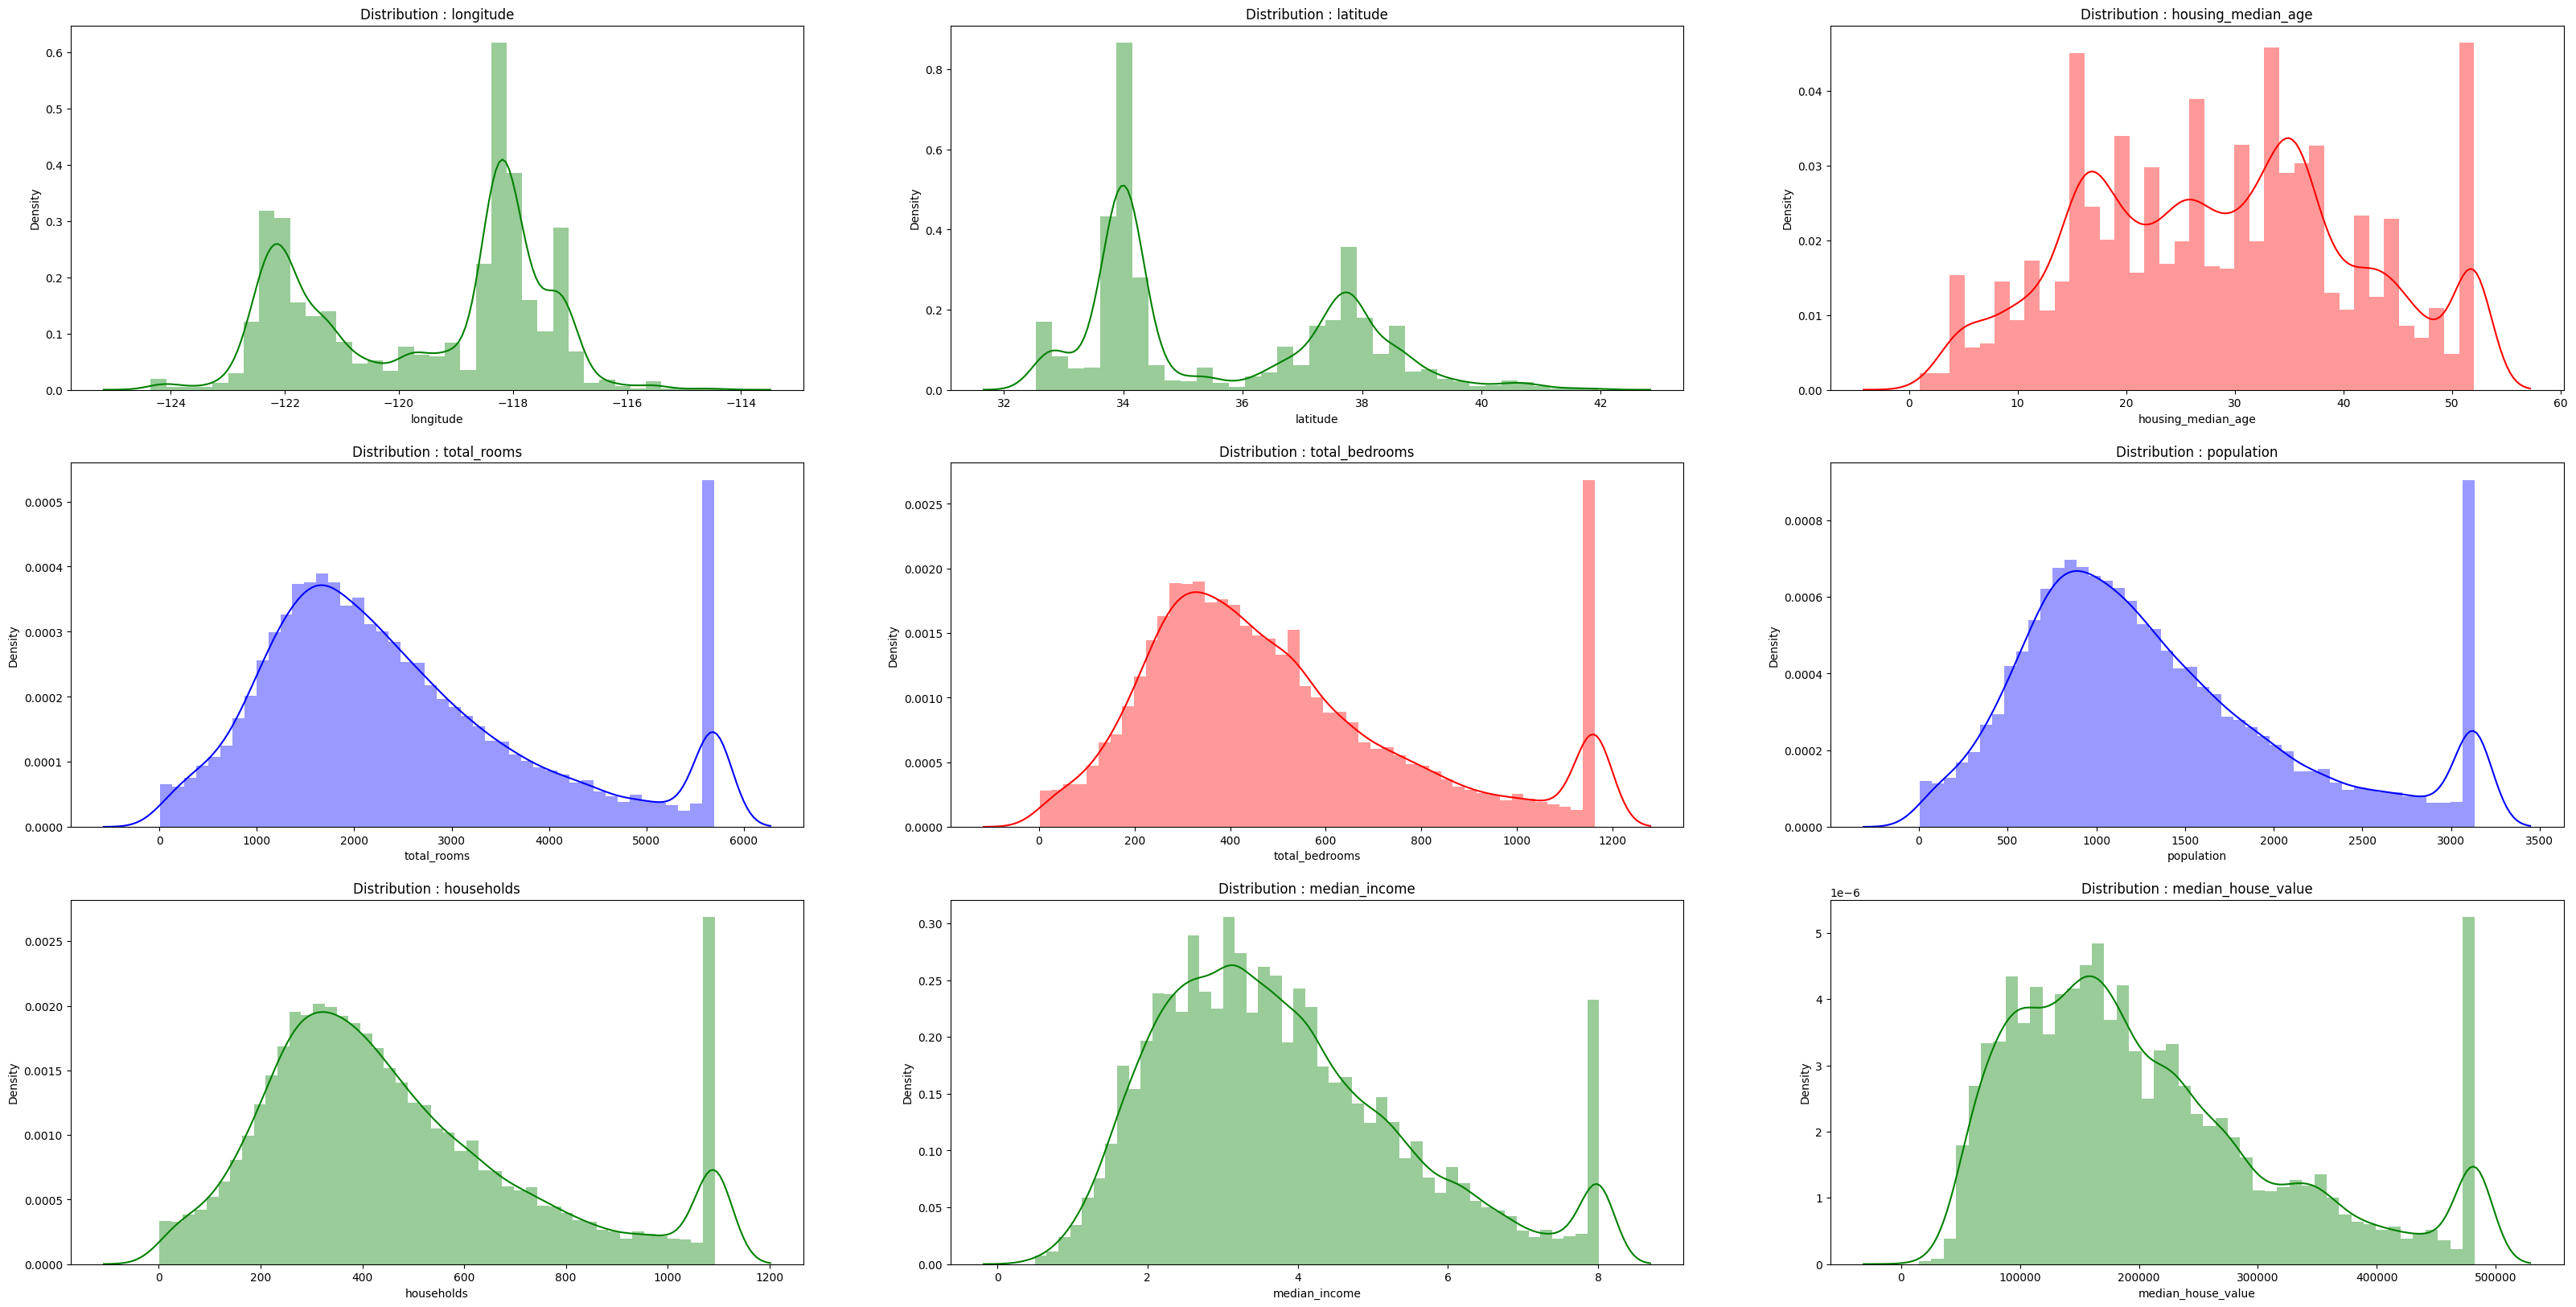

In [24]:
colors = ['Green','Green','Red','Blue','Red','Blue','Green','Green','Green']
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (40,20))
for i in range(min(len(check_1), 9)):
    plt.subplot(3,3,i+1)
    sns.distplot(df[check_1[i]],color = colors[i])
    title = 'Distribution : ' + check_1[i]
    plt.title(title)
plt.show()

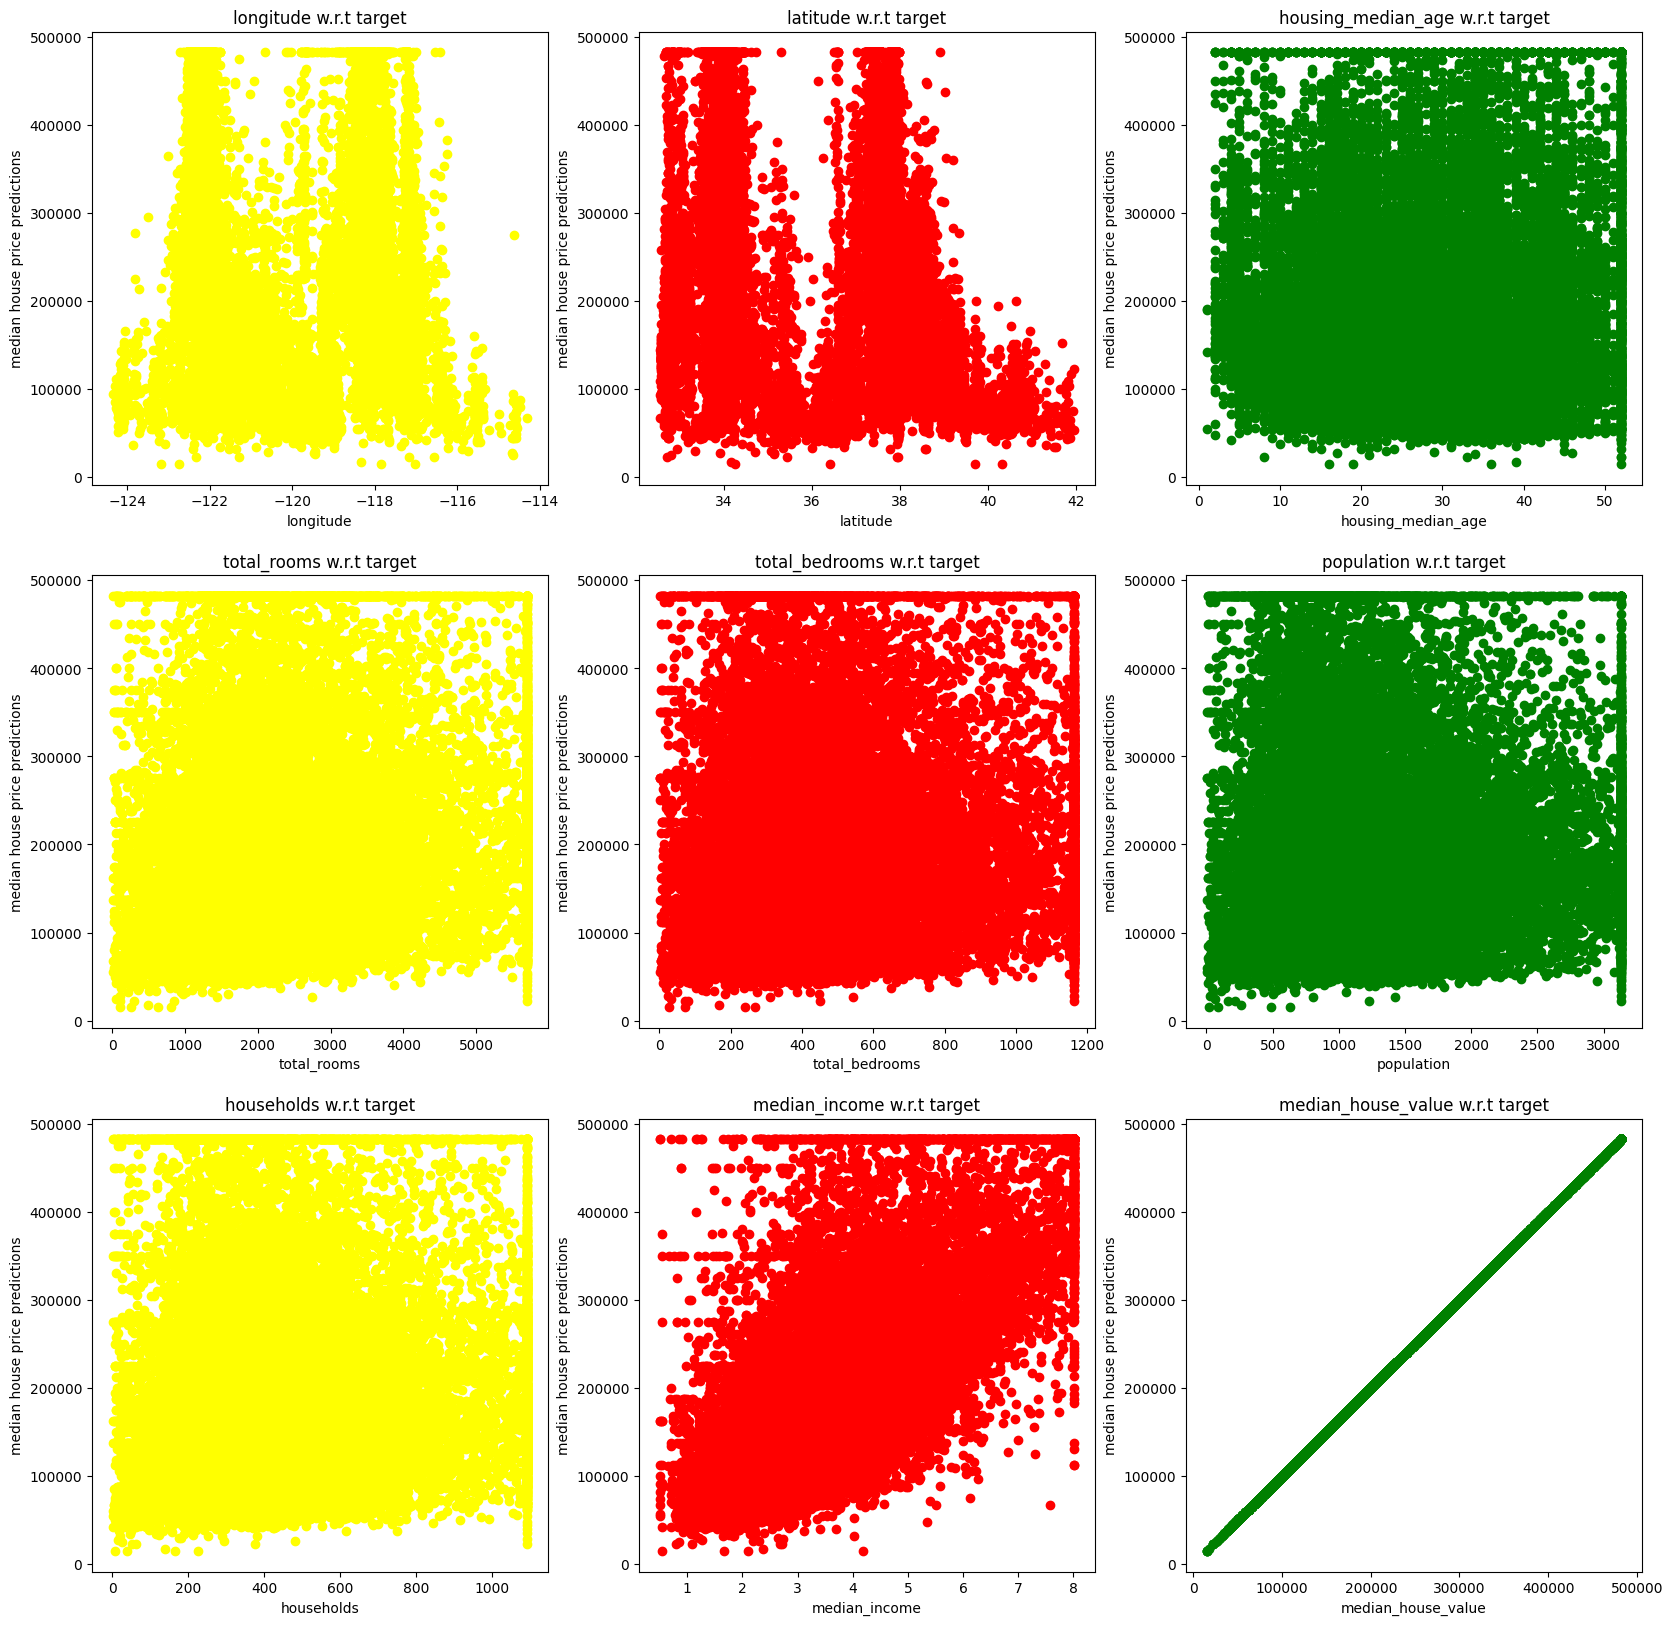

In [25]:
check_1 = []
for i in df:
  check_1.append(i)
colors = ['#E94B3C','#2D2926']
colors1 =['Yellow','Red','Green','Yellow','Red','Green','Yellow','Red','Green']
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (20,20))
for i in range(min(len(check_1), 9)):
    plt.subplot(3,3,i+1)
    plt.scatter(df[check_1[i]],df["median_house_value"],color = colors1[i])
    plt.xlabel(check_1[i])
    plt.ylabel("median house price predictions")
    title = check_1[i] + ' w.r.t target'
    plt.title(title)
plt.show()
# visually inspecting the relationship between each feature and the target variable.
#This can be helpful for selecting features to include in a model or identifying potential outliers.

<Axes: >

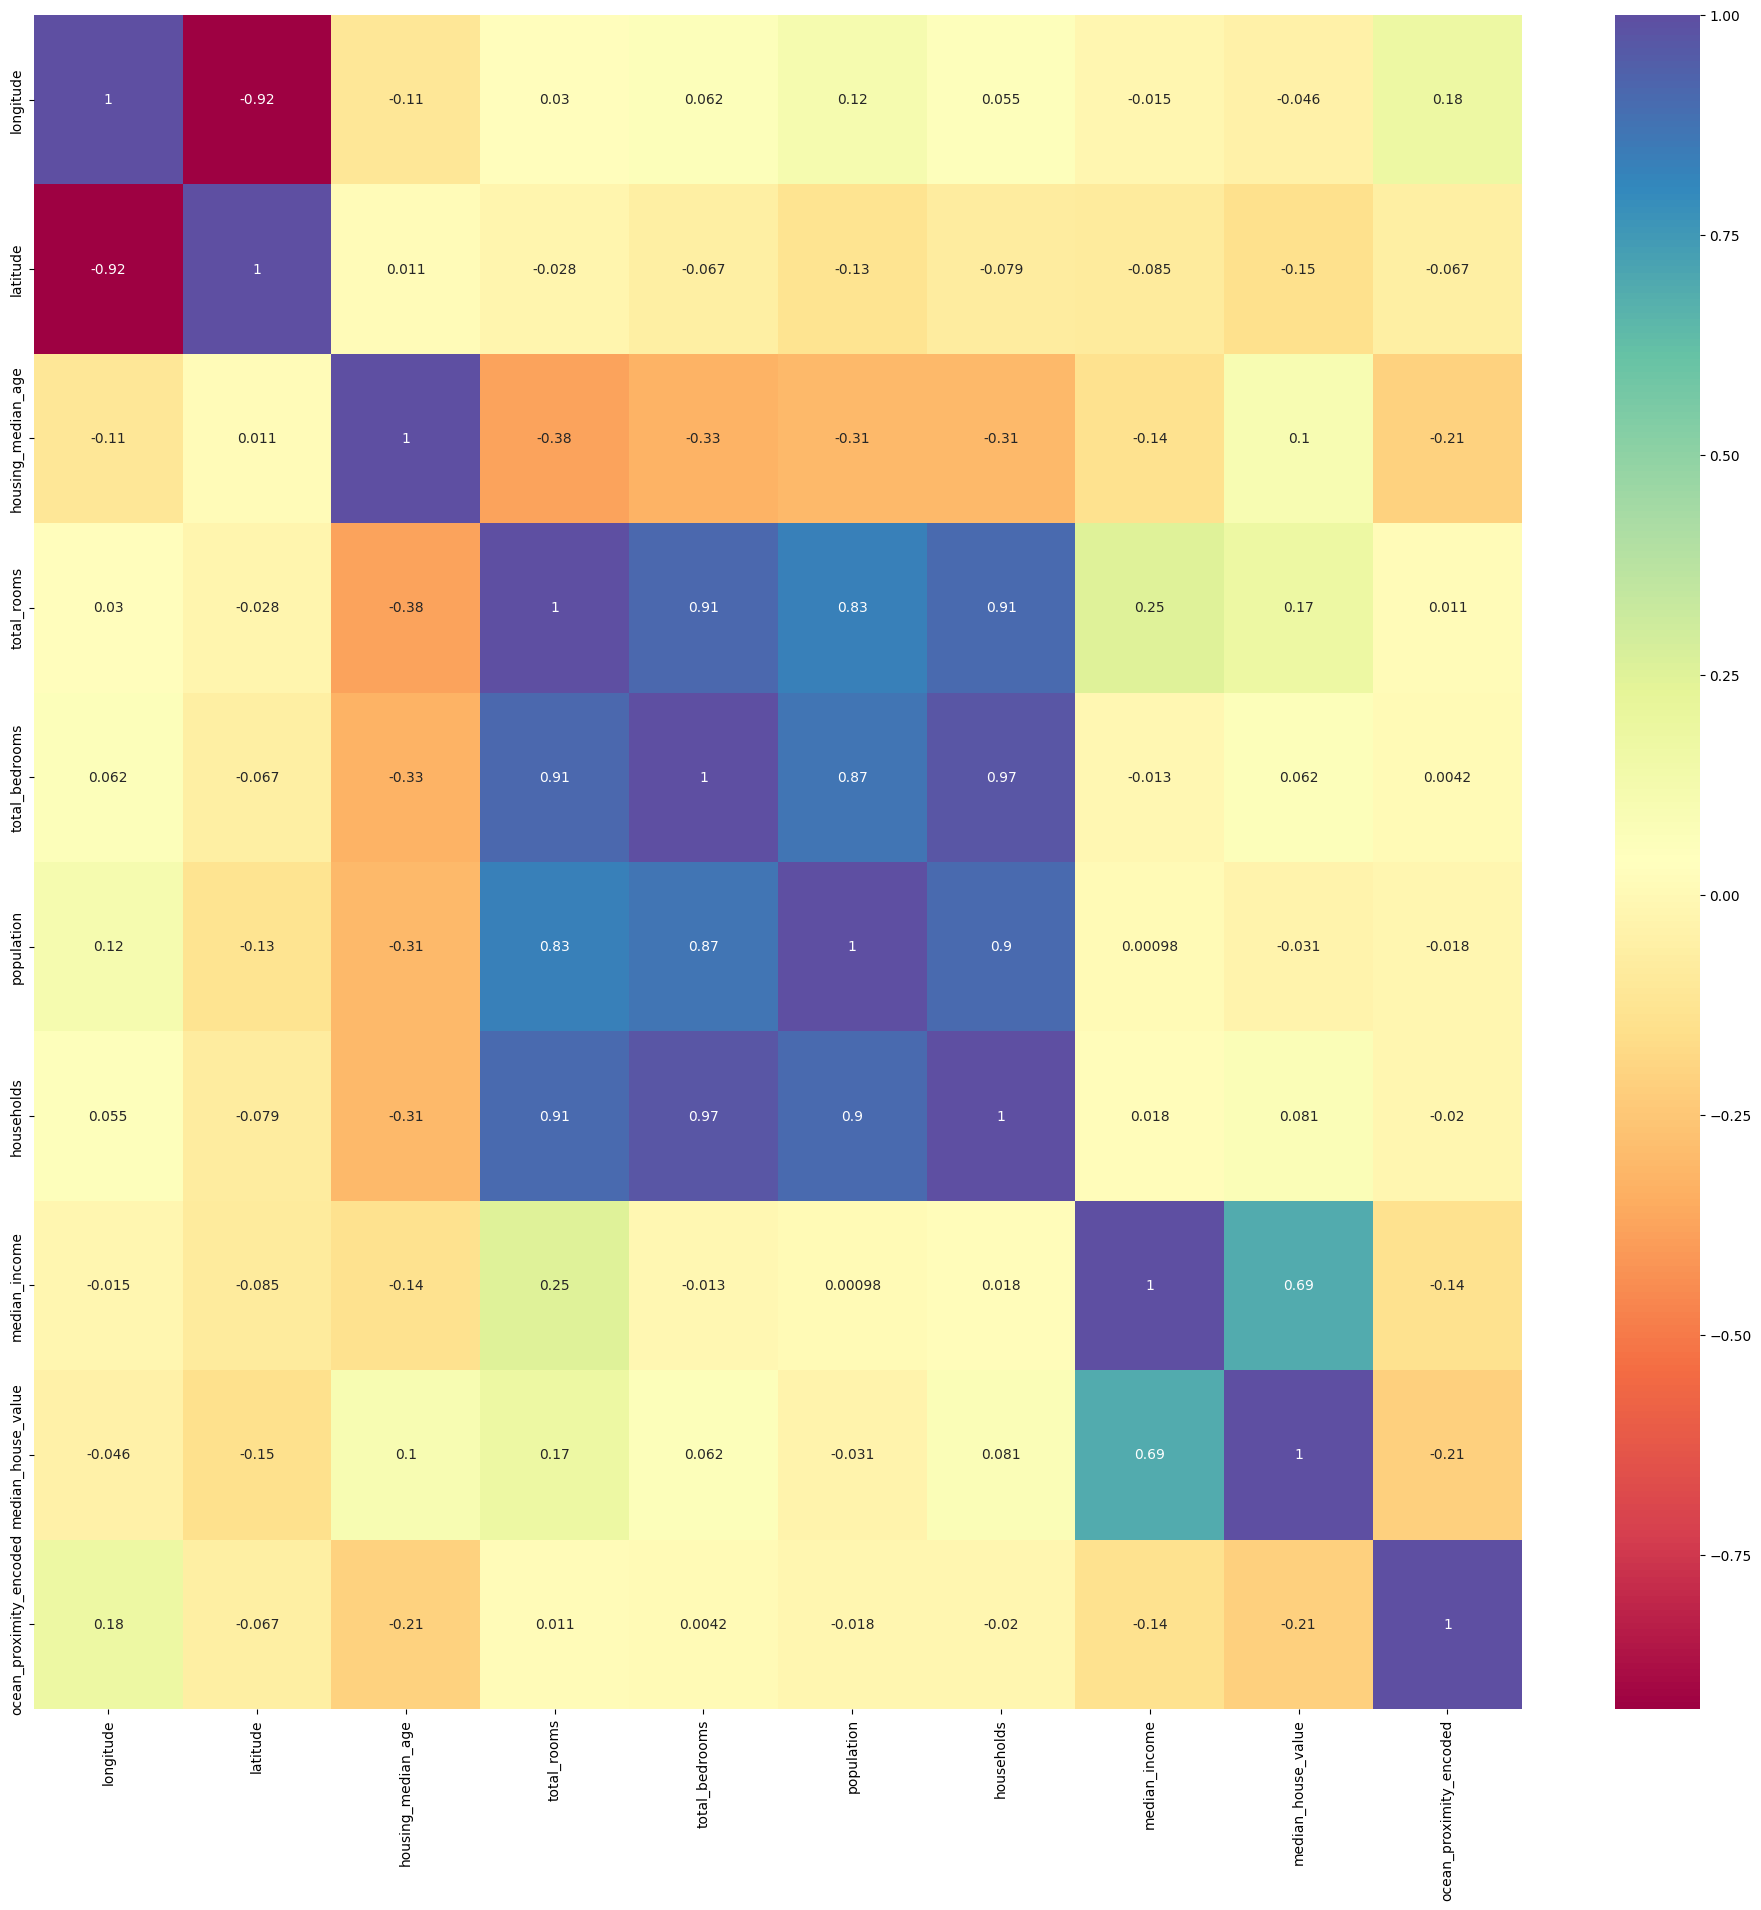

In [26]:
plt.figure(figsize=[24,22])
sns.heatmap(df.corr(),annot=True,cmap='Spectral')

<Axes: >

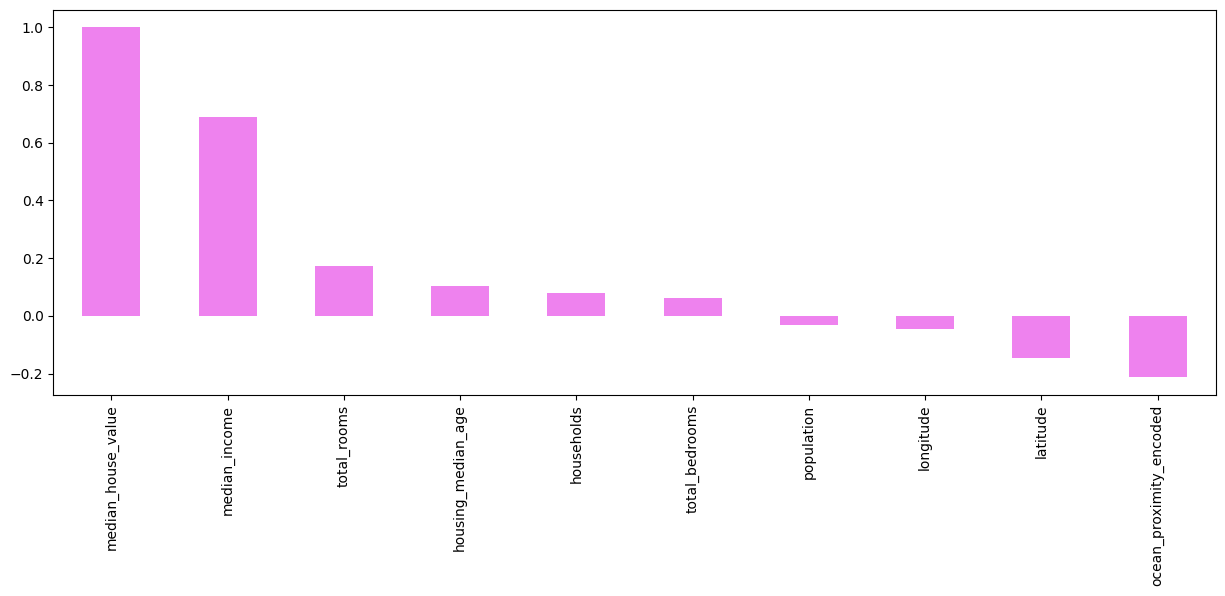

In [27]:
plt.figure(figsize=(15,5))
df.corr()['median_house_value'].sort_values(ascending = False).plot(kind='bar',color='violet')

In [28]:
#Dropping unnecessary Features which do not affect much to the Target Value when Changed
df1 = df.drop(['longitude', 'latitude', 'housing_median_age', 'total_bedrooms', 'population', 'households'],   axis=1)

<Axes: >

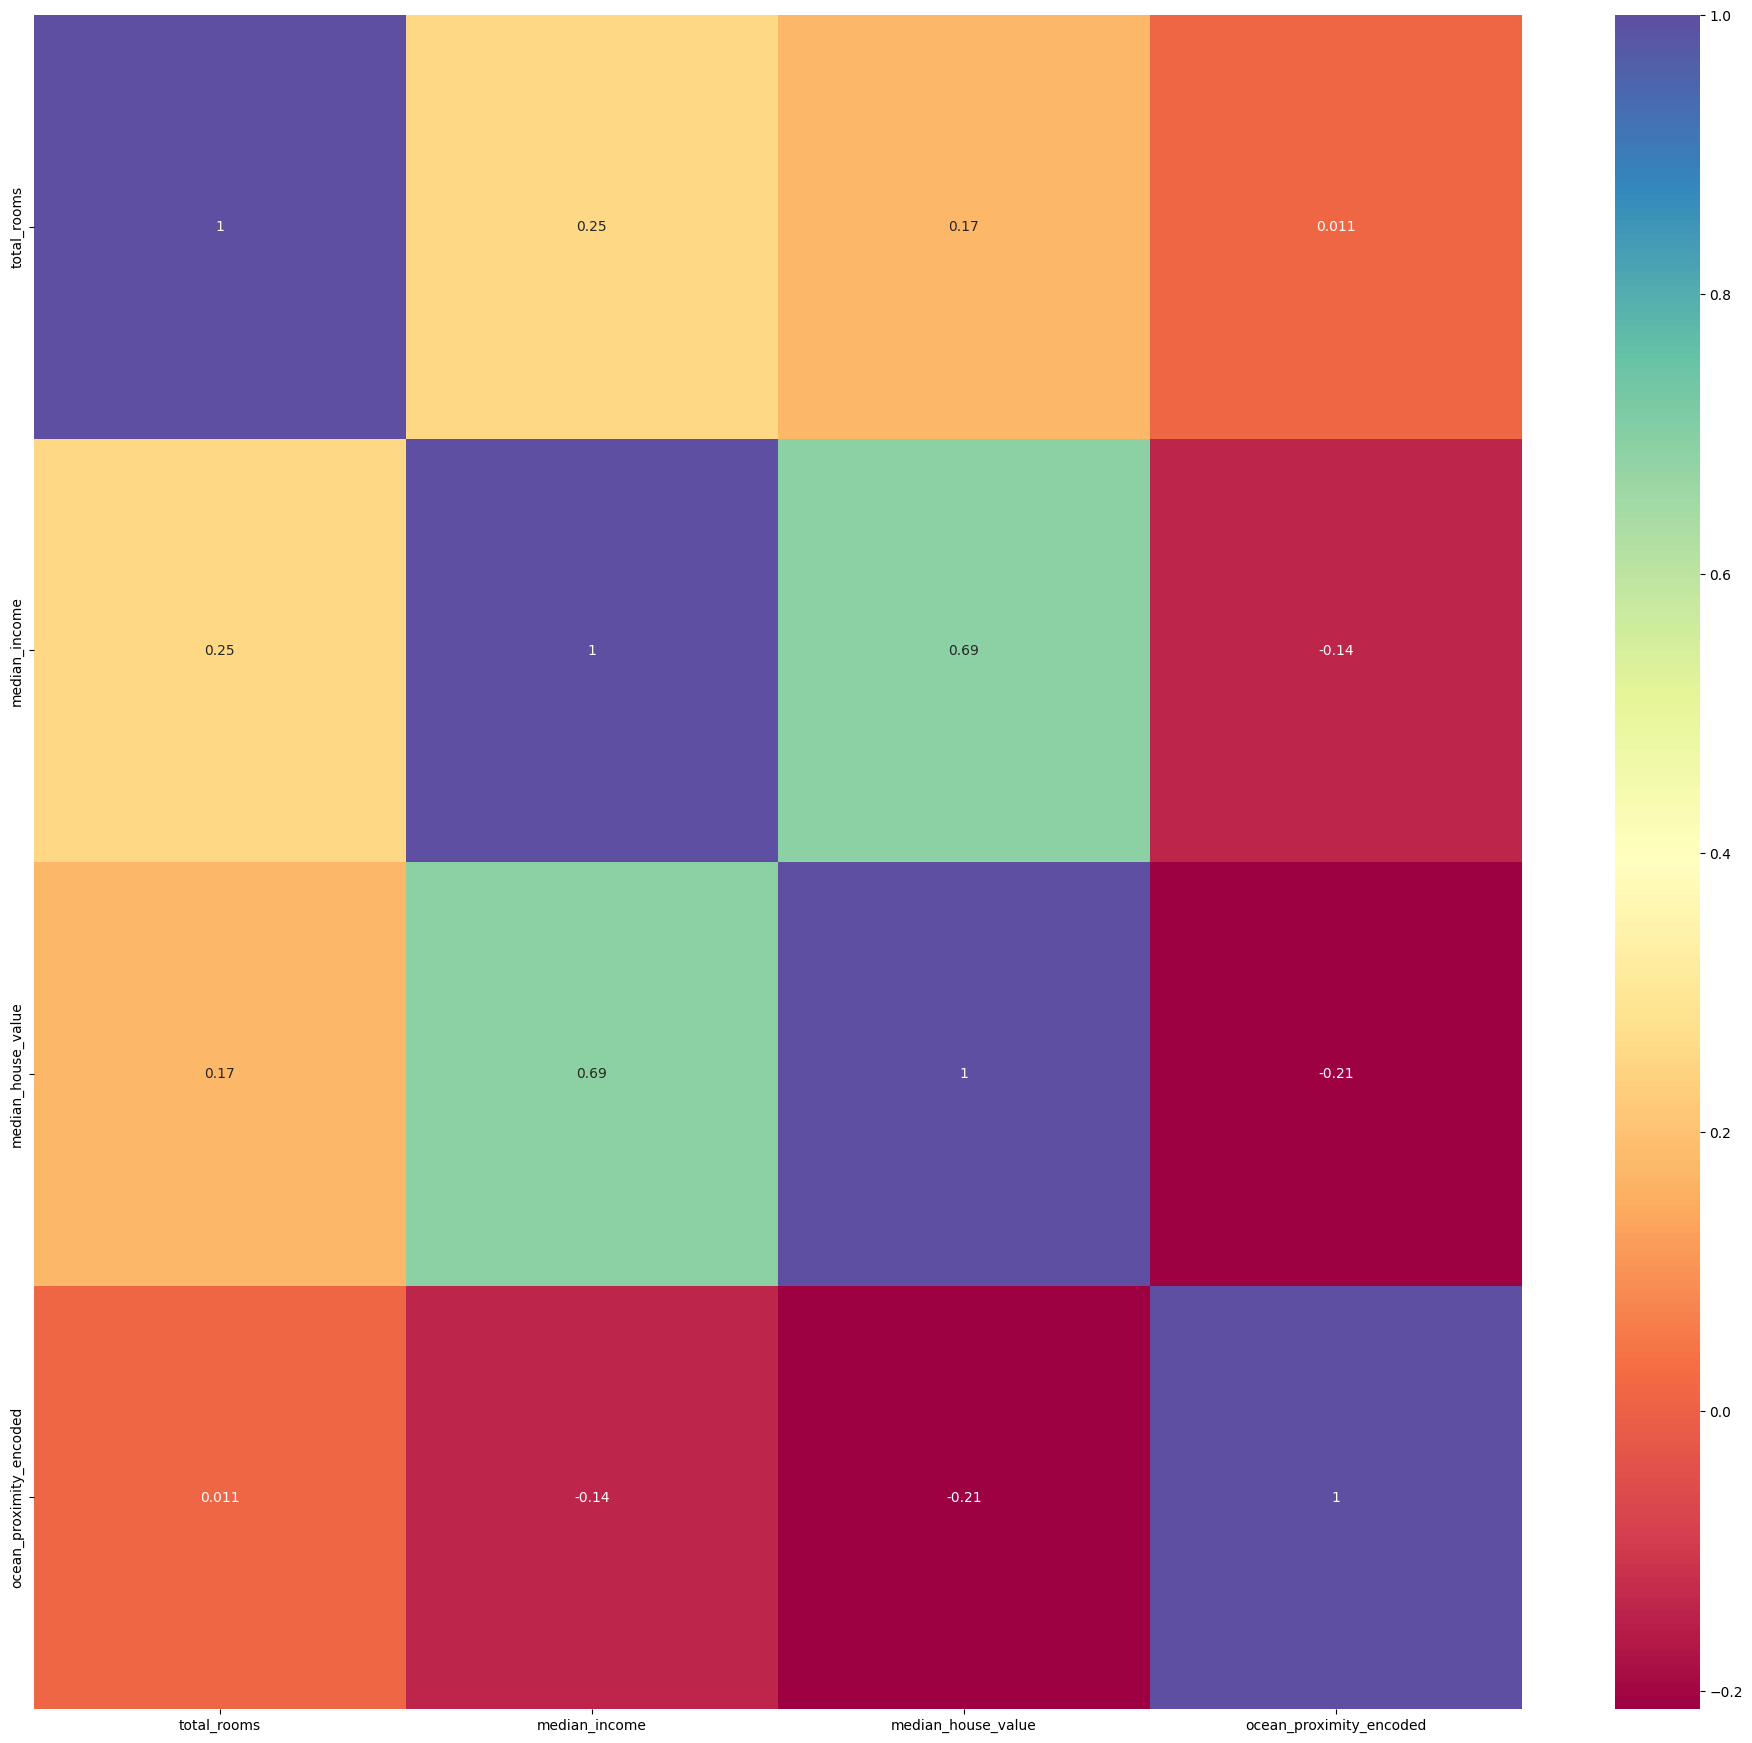

In [29]:
plt.figure(figsize=[24,22])
sns.heatmap(df1.corr(),annot=True,cmap='Spectral')

In [30]:
df1.head()

,total_rooms,median_income,median_house_value,ocean_proximity_encoded
0,880.000,8.013025,452600.0,1.0
1,5698.375,8.013025,358500.0,1.0
2,1467.000,7.257400,352100.0,1.0
3,1274.000,5.643100,341300.0,1.0
4,1627.000,3.846200,342200.0,1.0


In [31]:
#Extraction of Col List
colList=df1.columns
print(colList)

Index(['total_rooms', 'median_income', 'median_house_value',
       'ocean_proximity_encoded'],
      dtype='object')


In [32]:
for item in colList:
  print(df1[item].nunique())

4808
12303
3779
5


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   total_rooms              20640 non-null  float64
 1   median_income            20640 non-null  float64
 2   median_house_value       20640 non-null  float64
 3   ocean_proximity_encoded  20640 non-null  float64
dtypes: float64(4)
memory usage: 645.1 KB


In [34]:
numerical_column=['total_rooms', 'median_income', 'median_house_value', 'ocean_proximity_encoded']
categorical_column=[]

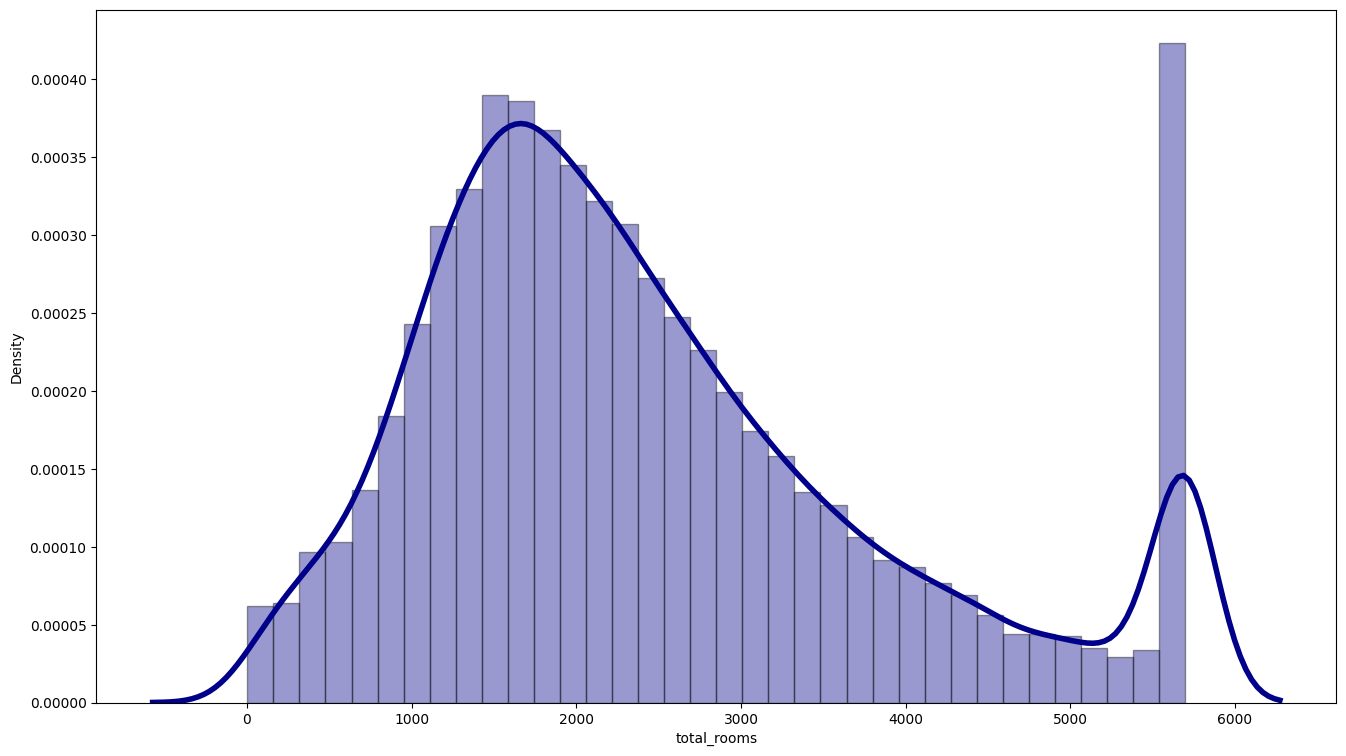

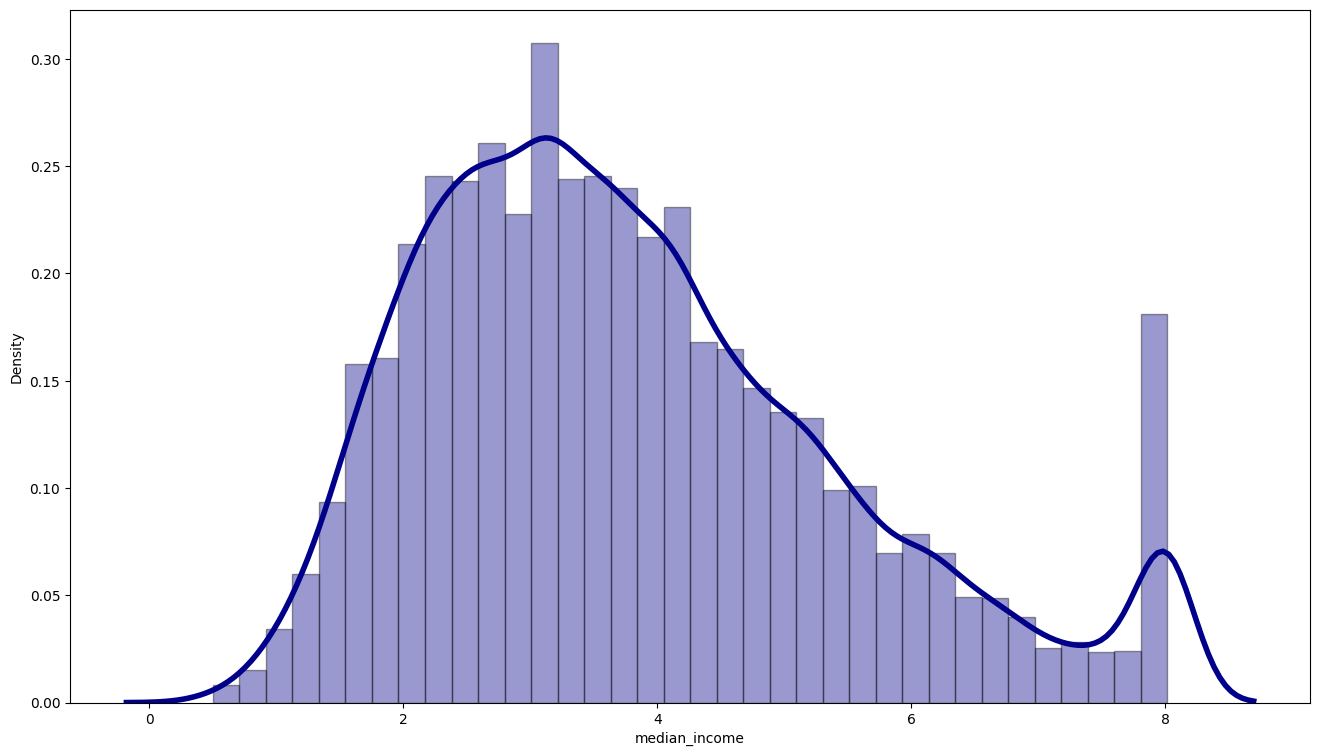

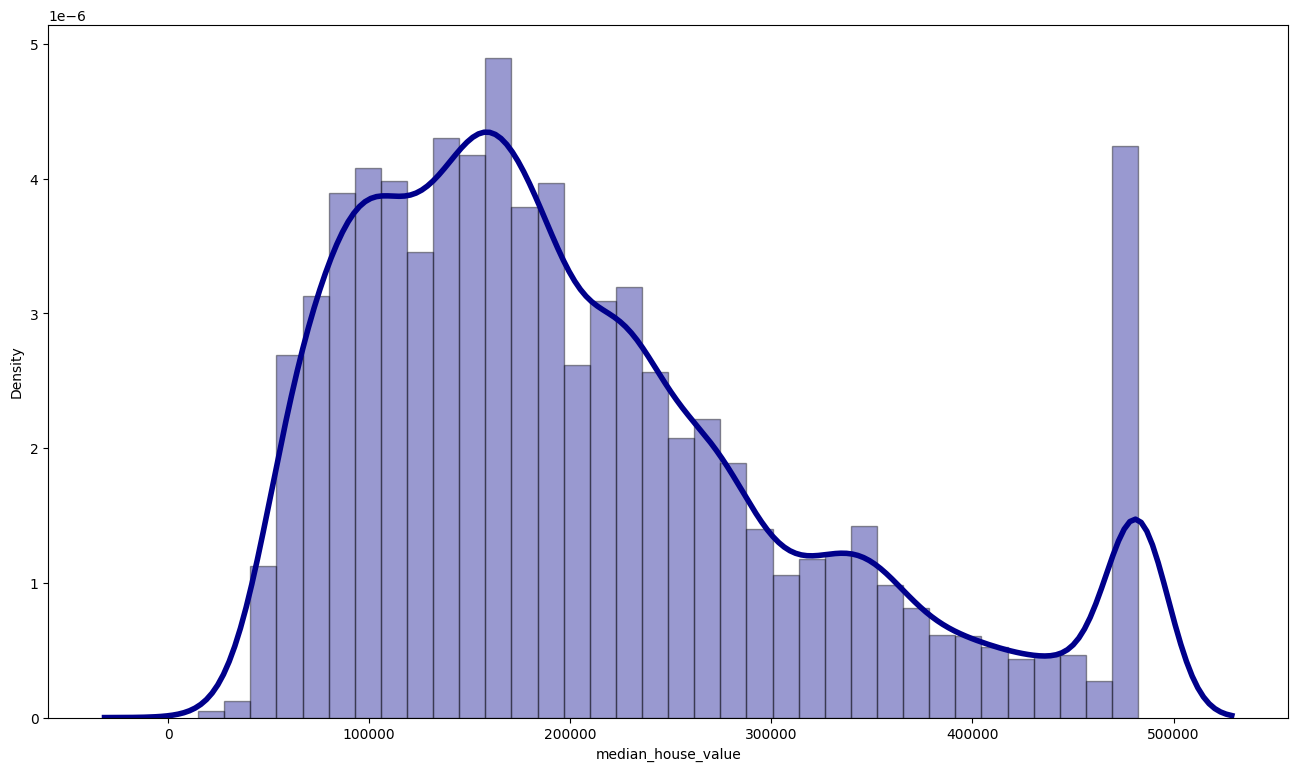

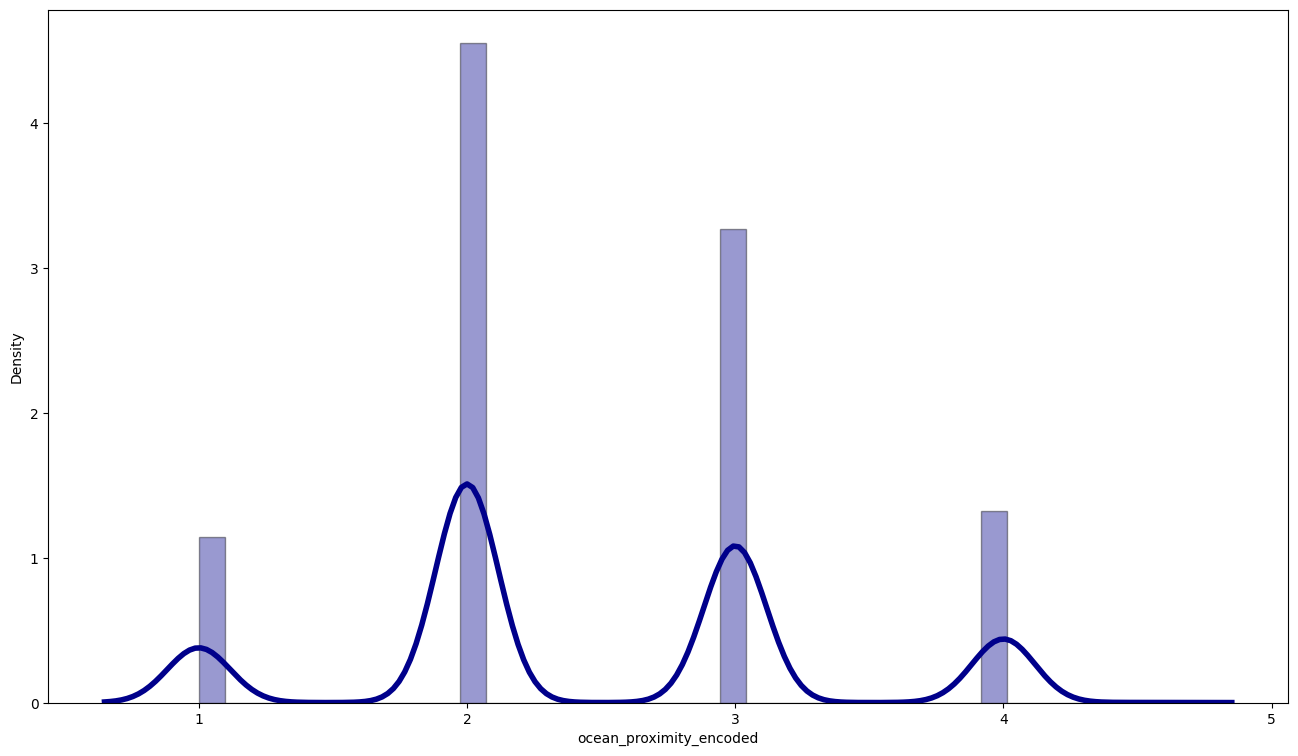

In [35]:
#Distribution Plotting of each Feature
for item in numerical_column:
  plt.figure(figsize=(16,9))
  sns.distplot(df1[item], hist=True, kde=True,
              bins=int(180/5), color = 'darkblue',
              hist_kws={'edgecolor':'black'},
              kde_kws={'linewidth': 4})
  plt.show()

In [55]:
#pip install apache-beam[interactive]


In [57]:
#pip install tensorflow-data-validation


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.5/22.5 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.5/173.5 kB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.1/288.1 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.0/293.0 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.9/332.9 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.5/229.5 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [58]:
import apache_beam as beam
import tensorflow_data_validation as tfdv


In [59]:
# Convert DataFrame to a list of dictionaries
data_list = df.to_dict('records')

In [60]:
# Create a Beam pipeline
with beam.Pipeline() as pipeline:
    data = (
        pipeline
        | 'ReadData' >> beam.Create(data_list)
    )

In [61]:
# Generate statistics for the specified numerical columns
statistics = tfdv.generate_statistics_from_dataframe(df)


In [62]:
# Generate graphical statistics
tfdv.visualize_statistics(statistics)

In [63]:
tfdv.write_stats_text(statistics, 'stats_output.txt')

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
check_1 = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity_encoded']
df_check_1 = df[check_1]

In [66]:
X = df_check_1.drop(columns=['median_house_value'])  # Features
y = df_check_1['median_house_value']  # Target label

# Initialize and train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X, y)

# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top N most important features
top_n = 10  # Adjust the number of top features as needed
top_features = importance_df.head(top_n)
print(f'Top {top_n} Most Important Features:')
print(top_features)

Top 10 Most Important Features:
                   Feature  Importance
7            median_income    0.507171
8  ocean_proximity_encoded    0.117909
0                longitude    0.114938
1                 latitude    0.098690
2       housing_median_age    0.058396
5               population    0.033885
3              total_rooms    0.025447
4           total_bedrooms    0.022800
6               households    0.020763


In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
#df = pd.read_csv('your_dataset.csv')

# Assuming 'median_house_price' is your target variable
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Split the data into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features to have the same range
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [ ]:
import tensorflow as tf

model_mlp = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_mlp.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

history_mlp = model_mlp.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)


2023-10-13 03:30:10.451257: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-13 03:30:11.895817: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/100
516/516 [==============================] - 5s 7ms/step - loss: 54827683840.0000 - mean_absolute_error: 204983.0000 - val_loss: 52170399744.0000 - val_mean_absolute_error: 199313.2969
Epoch 2/100
516/516 [==============================] - 3s 6ms/step - loss: 46887796736.0000 - mean_absolute_error: 186417.2344 - val_loss: 38298554368.0000 - val_mean_absolute_error: 164266.3438
Epoch 3/100
516/516 [==============================] - 2s 5ms/step - loss: 29207916544.0000 - mean_absolute_error: 137566.8438 - val_loss: 20812914688.0000 - val_mean_absolute_error: 111480.5312
Epoch 4/100
516/516 [==============================] - 2s 4ms/step - loss: 15850689536.0000 - mean_absolute_error: 96468.6094 - val_loss: 13045940224.0000 - val_mean_absolute_error: 87070.5781
Epoch 5/100
516/516 [==============================] - 2s 4ms/step - loss: 11291618304.0000 - mean_absolute_error: 80985.5859 - val_loss: 10616810496.0000 - val_mean_absolute_error: 78281.9531
Epoch 6/100
516/516 [========

In [44]:
model_linear = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(X_train.shape[1],))
])

model_linear.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

history_linear = model_linear.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)


Epoch 1/100
516/516 [==============================] - 5s 7ms/step - loss: 55421161472.0000 - mean_absolute_error: 206302.4219 - val_loss: 54543368192.0000 - val_mean_absolute_error: 204694.7031
Epoch 2/100
516/516 [==============================] - 6s 11ms/step - loss: 55420821504.0000 - mean_absolute_error: 206301.9219 - val_loss: 54543048704.0000 - val_mean_absolute_error: 204694.2344
Epoch 3/100
516/516 [==============================] - 5s 10ms/step - loss: 55420534784.0000 - mean_absolute_error: 206301.5000 - val_loss: 54542774272.0000 - val_mean_absolute_error: 204693.7656
Epoch 4/100
516/516 [==============================] - 3s 6ms/step - loss: 55420239872.0000 - mean_absolute_error: 206300.9062 - val_loss: 54542491648.0000 - val_mean_absolute_error: 204693.2500
Epoch 5/100
516/516 [==============================] - 4s 7ms/step - loss: 55419887616.0000 - mean_absolute_error: 206300.5469 - val_loss: 54542192640.0000 - val_mean_absolute_error: 204692.7656
Epoch 6/100
516/516 [==

In [45]:
model_dnn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_dnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

history_dnn = model_dnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)


Epoch 1/100
516/516 [==============================] - 2s 3ms/step - loss: 35506429952.0000 - mean_absolute_error: 151146.9375 - val_loss: 10006109184.0000 - val_mean_absolute_error: 75936.8984
Epoch 2/100
516/516 [==============================] - 1s 3ms/step - loss: 7340985856.0000 - mean_absolute_error: 64159.8984 - val_loss: 6383806464.0000 - val_mean_absolute_error: 60119.9961
Epoch 3/100
516/516 [==============================] - 1s 2ms/step - loss: 5455470080.0000 - mean_absolute_error: 55070.9766 - val_loss: 5280781824.0000 - val_mean_absolute_error: 54053.8750
Epoch 4/100
516/516 [==============================] - 1s 2ms/step - loss: 4652554240.0000 - mean_absolute_error: 50524.5156 - val_loss: 4687838720.0000 - val_mean_absolute_error: 50665.7578
Epoch 5/100
516/516 [==============================] - 1s 3ms/step - loss: 4210995712.0000 - mean_absolute_error: 47714.4023 - val_loss: 4380591104.0000 - val_mean_absolute_error: 48340.7891
Epoch 6/100
516/516 [=====================

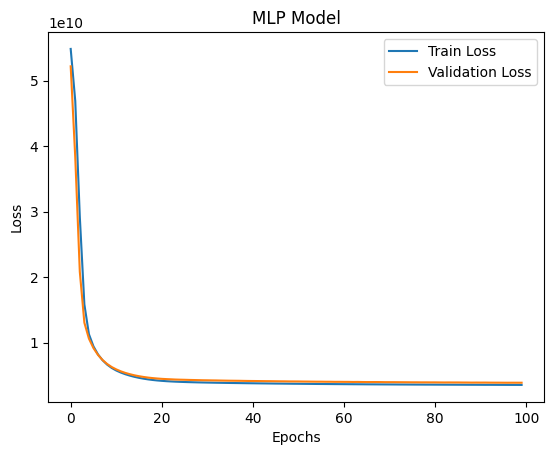

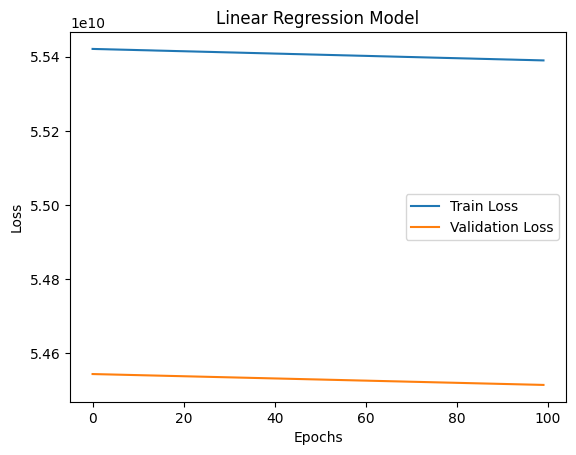

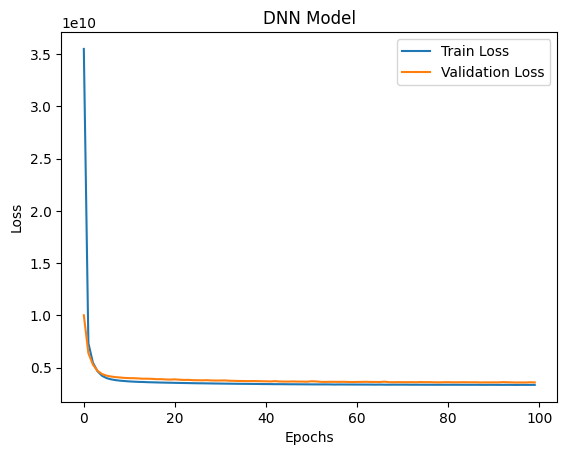

In [52]:
import matplotlib.pyplot as plt

def plot_loss(history, title):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history_mlp, 'MLP Model')
plot_loss(history_linear, 'Linear Regression Model')
plot_loss(history_dnn, 'DNN Model')

# Choose the best model based on validation loss
#best_model = model_mlp if history_mlp.history['val_loss'][-1] < history_linear.history['val_loss'][-1] else model_linear
#best_model = best_model if best_model.history['val_loss'][-1] < history_dnn.history['val_loss'][-1] else model_dnn



# Choose the best model based on validation loss
best_model = model_mlp
best_loss = history_mlp.history['val_loss'][-1]

if history_linear.history['val_loss'][-1] < best_loss:
    best_model = model_linear
    best_loss = history_linear.history['val_loss'][-1]

if history_dnn.history['val_loss'][-1] < best_loss:
    best_model = model_dnn

In [53]:
# Use the best model for predictions
y_pred = best_model.predict(X_val)

# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


129/129 [==============================] - 0s 2ms/step
Mean Squared Error: 3577111159.8330894
Mean Absolute Error: 41452.8362696448
